In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Reading in the data

In [5]:
data = pd.read_csv("Daten/zip.train", header=None, sep=" ")
data = data.iloc[:,0:-1] # last column (NaN) is deleted
data.head()

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,256
0,6.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-0.631,0.862,...,0.304,0.823,1.000,0.482,-0.474,-0.991,-1.000,-1.000,-1.000,-1.0
1,5.0,-1.0,-1.0,-1.0,-0.813,-0.671,-0.809,-0.887,-0.671,-0.853,...,-0.671,-0.671,-0.033,0.761,0.762,0.126,-0.095,-0.671,-0.828,-1.0
2,4.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,...,-1.000,-1.000,-1.000,-0.109,1.000,-0.179,-1.000,-1.000,-1.000,-1.0
3,7.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.273,0.684,0.960,0.450,...,-0.318,1.000,0.536,-0.987,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0
4,3.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.928,-0.204,0.751,0.466,...,0.466,0.639,1.000,1.000,0.791,0.439,-0.199,-0.883,-1.000,-1.0


## Looking at one example image

In [29]:
example_image = pd.DataFrame(data.iloc[1,1:]) # select row 2 of the dataframe, columns 1 to end
test = np.mean(example_image)
print(test)
example_image.shape # show shape of image
example_image_reshaped = example_image.values.reshape(16,16)

1   -0.111738
dtype: float64


<function matplotlib.pyplot.show(*args, **kw)>

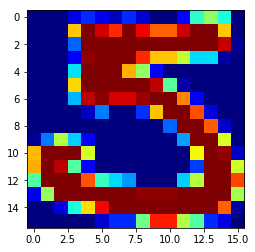

In [7]:
plt.imshow(example_image_reshaped,cmap="jet",interpolation="nearest")
plt.show

## Extracting the mean images for all numbers & showing them all in a plot

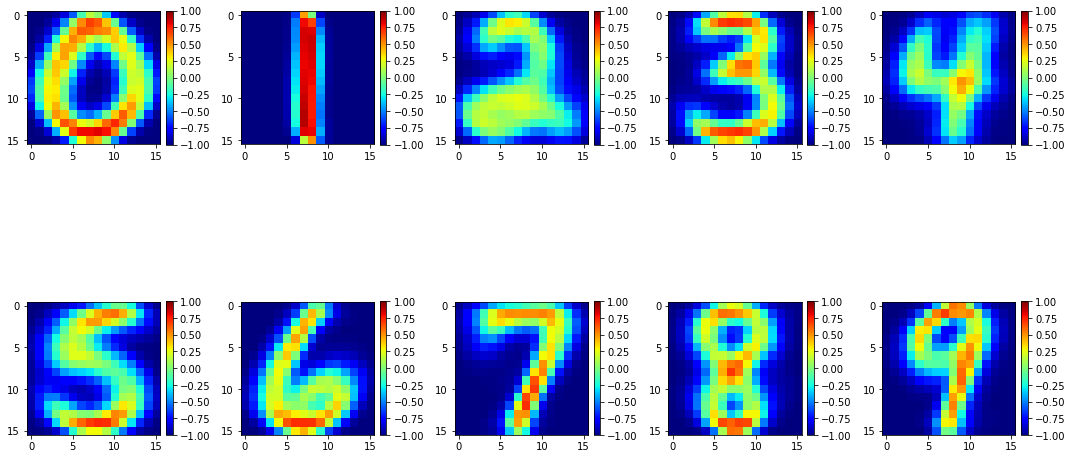

In [8]:
images = data.iloc[:,1:] # select all rows, columns 1 to end

fig=plt.figure(figsize=(15, 15))
columns = 5
rows = 2
for i in range(0, columns*rows):
    digit_rows = images[data[0] == float(i)]
    mean_digit_rows = digit_rows.mean()
    img = mean_digit_rows.values.reshape(16,16)
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(img,cmap="jet",interpolation="nearest",vmin=-1,vmax=1)
    plt.colorbar(fraction=0.046, pad=0.04)
    plt.tight_layout()
plt.show()

    

## Extracting the sd images for all numbers & showing them all in a plot

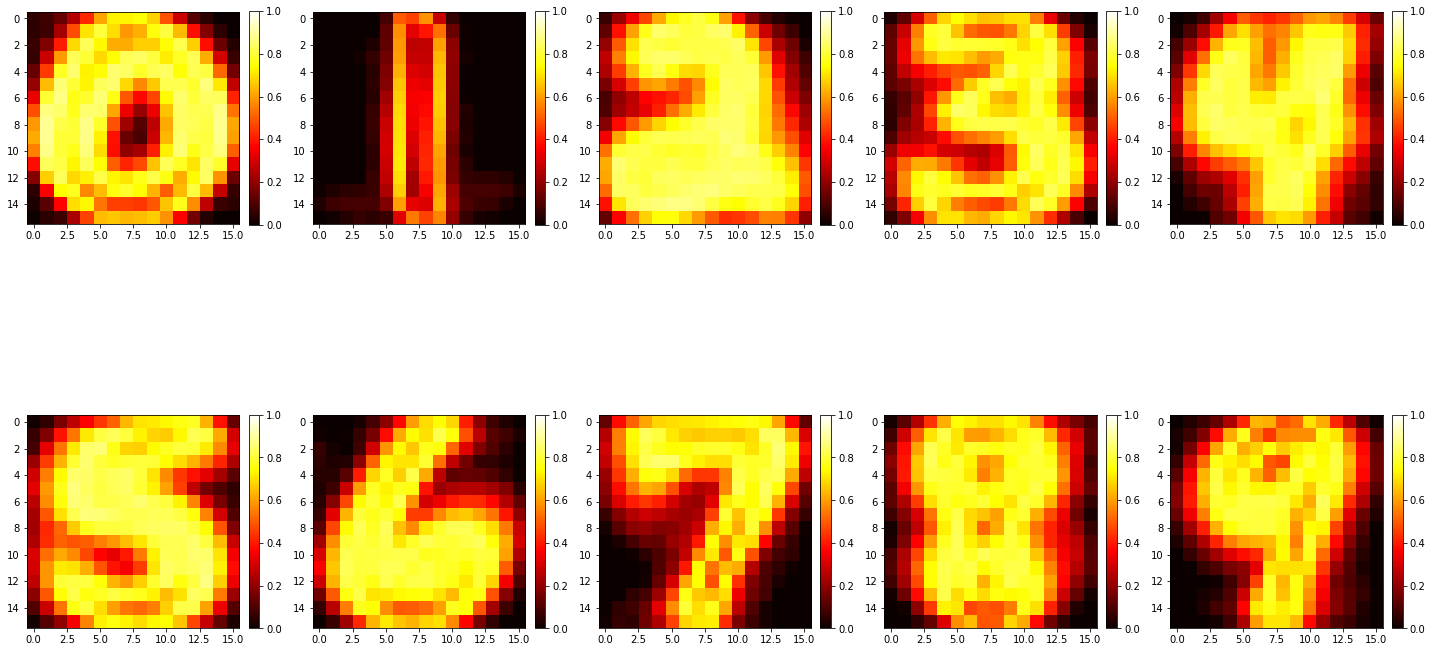

In [74]:
fig=plt.figure(figsize=(20, 20))
columns = 5
rows = 2
for i in range(0, columns*rows):
    digit_rows = images[data[0] == float(i)] # all data rows of this number
    sd_digit_rows = np.std(digit_rows) # the sd (over the rows for this number)
    img = sd_digit_rows.values.reshape(16,16)
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(img,cmap="hot",interpolation="nearest",vmin=0,vmax=1)
    plt.colorbar(fraction=0.046, pad=0.04)
    plt.tight_layout()
plt.show()

## Summaries for each mean digit: mean, max, min, sd, range, number of observations

In [35]:
vals = np.zeros((5,10)) #creating an empty np_array
stats_df = pd.DataFrame(data=vals,columns = [0,1,2,3,4,5,6,7,8,9],index = ["Mean","Max","Min","SD","NrObs"])
for j in range(0,10):
    rows = images[data[0]==float(j)]
    #print(rows.shape[0])
    meanrow = rows.mean() # mean image for each digit
    sdrow = np.std(rows)
    meanval = np.mean(meanrow)
    maxval = np.max(meanrow)
    minval = np.min(meanrow)
    sdval = np.mean(sdrow) # the mean of the sd image --> average sd
    stats_df.loc['Mean',j] = meanval 
    stats_df.loc['Max',j] = maxval
    stats_df.loc['Min',j] = minval
    stats_df.loc['SD',j] = sdval
    stats_df.loc['NrObs',j] = rows.shape[0]
print(stats_df)


                 0            1           2           3           4  \
Mean     -0.299005    -0.703495   -0.442712   -0.433035   -0.569881   
Max       0.821243     0.903770    0.329394    0.723884    0.507192   
Min      -1.000000    -1.000000   -1.000000   -0.999995   -1.000000   
SD        0.577494     0.155365    0.623708    0.541682    0.537590   
NrObs  1194.000000  1005.000000  731.000000  658.000000  652.000000   

                5           6           7           8           9  
Mean    -0.423738   -0.494621   -0.583746   -0.444284   -0.550733  
Max      0.737775    0.725901    0.724211    0.708410    0.694498  
Min     -0.999459   -1.000000   -1.000000   -1.000000   -1.000000  
SD       0.600965    0.484779    0.415860    0.522251    0.430980  
NrObs  556.000000  664.000000  645.000000  542.000000  644.000000  


## Combining the mean and sd images

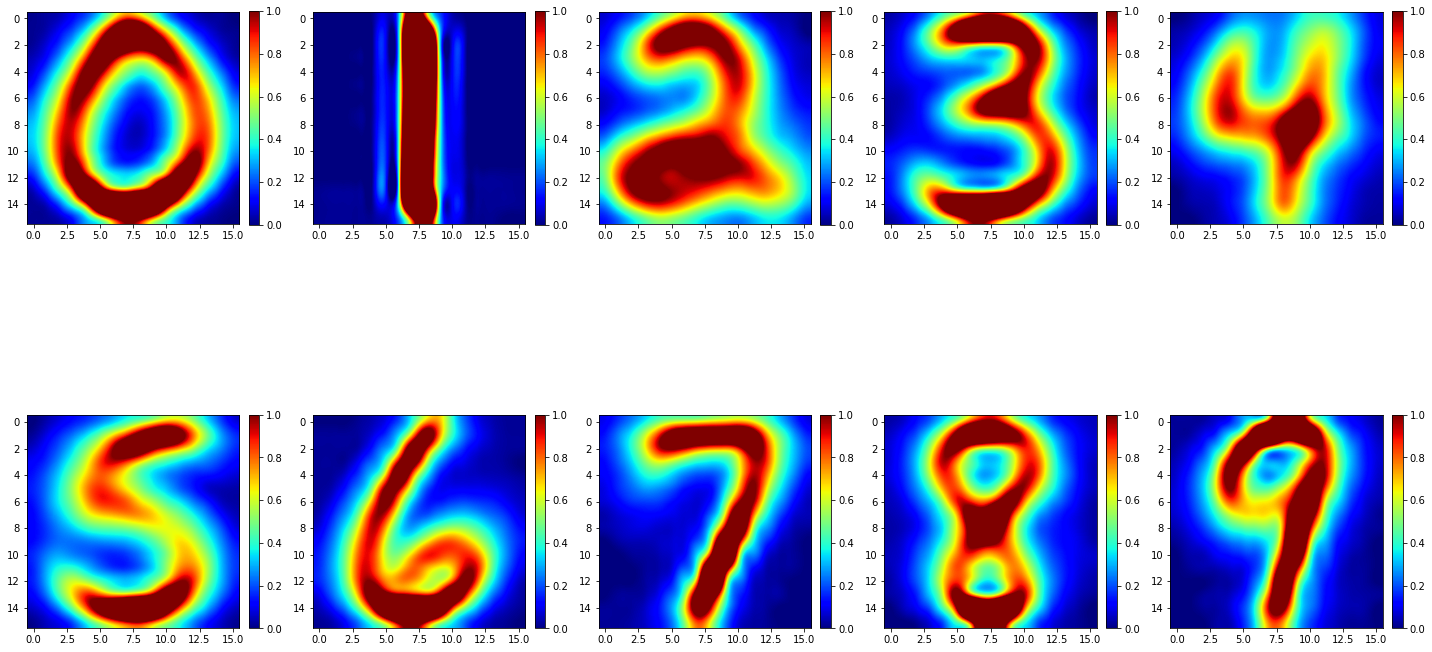

In [73]:
fig=plt.figure(figsize=(20, 20))
columns = 5
rows = 2
for i in range(0, columns*rows):
    digit_rows = images[data[0] == float(i)] # all data rows of this number
    sd_digit_rows = np.std(digit_rows) # the sd (over the rows for this number: how strongly does each pixel vary?)
    img_sd = sd_digit_rows.values.reshape(16,16)
    mean_digit_rows = digit_rows.mean()
    norm_mean_digit_rows = np.interp(mean_digit_rows, (mean_digit_rows.min(), mean_digit_rows.max()), (0, 1)) 
    img_mean = mean_digit_rows.values.reshape(16,16)
    new_img_mean = norm_mean_digit_rows.reshape(16,16)
    #print(img_mean)
    #print(norm_mean_digit_rows)
    type(img_mean) # numpy.ndarray
    #img_combi = img_sd*img_mean #element-wise multiplication (for each pixel)
    img_combi = new_img_mean/(img_sd+0.00000000000000000000001)
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(img_combi,cmap="jet",interpolation="lanczos",vmin=0,vmax=1)
    plt.colorbar(fraction=0.046, pad=0.04)
    plt.tight_layout()
plt.show()

In [63]:
#test: neue matrix ist mit Werten gefüllt!
n = 10
m = 20
die_matrix = np.ndarray((n,m))
#die_matrix

In [57]:
test = np.array([1,2,3])
powered = np.power(test,2)
print(powered)

[1 4 9]
